# Classifieur KPPV 

In [1]:
#auteur : I.CHELIKH 3704957

# imports des librairies
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn.decomposition import PCA

In [2]:
#fonction affichage de quelques exemples de la base de test
def plot_gallery(images):
  plt.figure(figsize=(7.2,7.2))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
  plt.show()


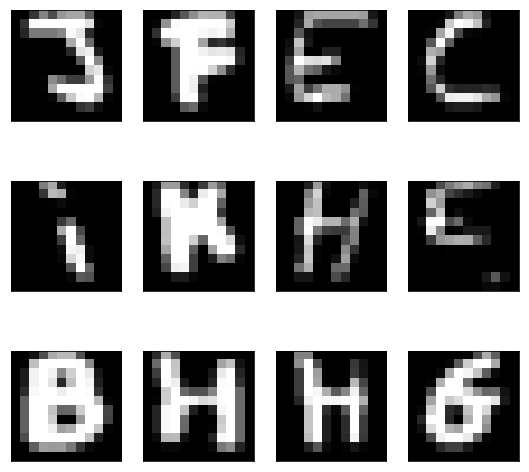

In [3]:
# chargement et affichage des données pour le modèle

X_train, X_test, y_train, y_test = np.load('data.npy', allow_pickle = True)

plot_gallery(X_train)



In [4]:
#traitement et refit des données pour le classifieur

X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
print(np.shape(X_train))
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
print(np.shape(X_test))

X_scaled_train = preprocessing.StandardScaler().fit_transform(X_train)
X_scaled_Test=preprocessing.StandardScaler().fit_transform(X_test)

(1875, 144)
(625, 144)


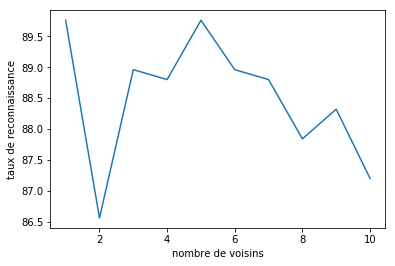

taux de reconnaissance optimal : 89.75999999999999 %
pour 1 voisins


In [59]:
#tableau de stockage des taux de reconnaissance
perf_tab = [0]*10
#tableau de nombre de voisins pour affichage et optimisation
N_neigh_test = [n for n in range(1,len(perf_tab)+1)]


#optimisation des paramètres du classifieur KPPV sans PCA avec metrique euclidian
for i in N_neigh_test:
    
    # commenter/décommenter la ligne au choix pour changer entre la metric euclidean et manhattan
    #KPPV= neighbors.KNeighborsClassifier(i,metric= "euclidean")
    KPPV= neighbors.KNeighborsClassifier(i,metric= "manhattan")
    b_n=KPPV.fit(X_train, y_train)
    y_pred= KPPV.predict(X_test)

    perf_tab[i-1]= metrics.accuracy_score(y_test, y_pred)*100
    
plt.plot(N_neigh_test, perf_tab)
plt.ylabel("taux de reconnaissance")
plt.xlabel("nombre de voisins")

plt.show()
#affichage des paramètres optimisés
t_opti = max(perf_tab)
n_opti = np.argmax(perf_tab)+1
print("taux de reconnaissance optimal :",t_opti, "%")
print("pour", n_opti, "voisins")

# KPPV avec Analyse de Composantes Principales

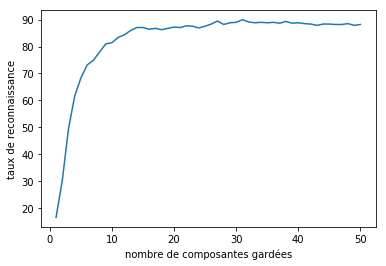

taux de reconnaissance optimal : 89.92 %
pour 32 composantes gardées


In [58]:
# reprise du code précédent en fixant n_voisins à n_opti trouvé

perf_tab = [0]*50

#tableau pour nombre de composantes principales
N_pC = N_neigh_test = [n for n in range(1,51)]
i = 0

# on fait varier le nombre de composantes à garder pour optimiser la PCA

for j in N_pC:
    pca=PCA(j)
    pc = pca.fit_transform(X_scaled_train)
    
    xpcatrain = pca.fit_transform(X_scaled_train)
    xpcatest=pca.transform(X_scaled_Test) #PAS DE FIT !

    classifier2=neighbors.KNeighborsClassifier(n_neighbors=5,metric = "euclidean")

    classifier2.fit(xpcatrain,y_train) 
    yPred=classifier2.predict(xpcatest)
    
    perf_tab[i]= metrics.accuracy_score(y_test, yPred)*100
    i+=1
  

plt.plot(N_pC, perf_tab)
    
plt.ylabel("taux de reconnaissance")
plt.xlabel("nombre de composantes gardées")

plt.show()

t_opti = max(perf_tab)
n_opti = N_pC[np.argmax(perf_tab)+1]
print("taux de reconnaissance optimal :",t_opti, "%")
print("pour", n_opti, "composantes gardées")
